# GEOS 518: Jupyter Notebook Assignment #2: Auto Regressive Models

## Taylor Dudunake
Due: 3/12/18

** In this Jupyter Notebook, I will complete the following tasks for discharge data at Middle Fork Boise River near Twin Springs (USGS 13184500): **
1. Read in dataset and perform any additional pre-processing needed
2. Split dataset into a "training" dataset used to estimate the parameters of the AR model, and a "test" dataset against which I will test the model
3. Estimate the parameters of an AR(1) model using the training dataset
    * Compute the autocorrelation function
    * Use the YW Equations to estimate the AR(1) parameters
    * Use the statsmodel AR tools to estimate the parameters based on the dataset
    * Compare the YW parameters to those from the statsmodel library
4. Estimate the parameters of an AR(2) model using the training dataset
    * Use the YW equations to estimate the AR(2) parameters
    * Use the statsmodel AR tools to estimate the parameters based on the dataset
    * Compare the YW parameters to those from the statsmodel library
5. Apply the AR(1) and AR(2) models to the "test" dataset (the one withheld from parameter estimation)
6. Plot the modeled time series for the AR(1) and AR(2) models against the observed time series for comparison
7. Comment on key differences and distinctions between the models themselves and the extent to which they reproduce the observations

## Preliminary Tasks: loading libraries
This cell imports necessary libraries to perform tasks in this Jupyter Notebook

In [12]:
import pandas as pd # Required for data management tasks

import numpy as np # Required for computation tasks useful for this analysis

import matplotlib.pyplot as plt # Required for all things plotting

from pandas.plotting import autocorrelation_plot # Generates an autocorrelation plot

import statsmodels.tsa.api as sm # Required for ADF Test

## Task 1. Read in dataset and perform any additional pre-processing needed
These cells import discharge data from .pkl file previously generated. It's important to view and inspect the data to ensure everything is properly formatted. In this case, the dates are properly formatted in the heading "SerDates". For the following tasks, I also need to describe each data entry by its water year.

In [2]:
# Load the MF Boise discharge dataset
df = pd.read_pickle('MFBoiseDischarge_WY2001-2017.pkl')
Q = df['Q (cms)'].values # sets discharge data in dataframe to a variable
day_num = np.arange(0,np.size(Q),1)

In [3]:
WY = np.zeros(len(df['Y'].index))
WY[df['M'].values < 10] = df['Y'].values[df['M'].values < 10]
WY[df['M'].values >= 10] = df['Y'].values[df['M'].values >= 10] + 1
df['WY'] = WY.astype(int)

qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Y,M,D,Q (cms),SerDates,WY
0,2000,10,1,8.694,2000-10-01,2001
1,2000,10,2,9.062,2000-10-02,2001
2,2000,10,3,8.807,2000-10-03,2001
3,2000,10,4,8.779,2000-10-04,2001
4,2000,10,5,8.750,2000-10-05,2001
5,2000,10,6,8.779,2000-10-06,2001
6,2000,10,7,8.779,2000-10-07,2001
7,2000,10,8,8.722,2000-10-08,2001
8,2000,10,9,8.665,2000-10-09,2001
9,2000,10,10,8.835,2000-10-10,2001


## Task 2. Split the dataframe into a training and test portion
This cell...

In [17]:
# I segment the whole dataframe into a training dataset (everything that's not Water Year 2015) and
# a test dataset (everything that is Water Year 2015).
df_train = df[df.WY != 2015]
df_test  = df[df.WY == 2015]

Q = df_train['Q (cms)'].values # sets discharge data in datafram to a variable

## Task 3. Estimate the parameters of an AR(1) model using the training dataset

### Task 3.1. Compute the autocorrelation function
These cells calculate the autocorrelation function and partial autocorrelation function of the training dataset.

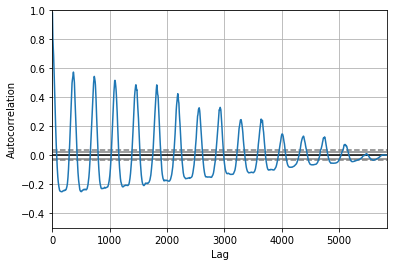

In [14]:
autocorrelation_plot(df_train['Q (cms)']) # this function calculates the autocorrelation coeffecient for lag = 0-6209
plt.ylim(-0.5,1.0)
plt.show()

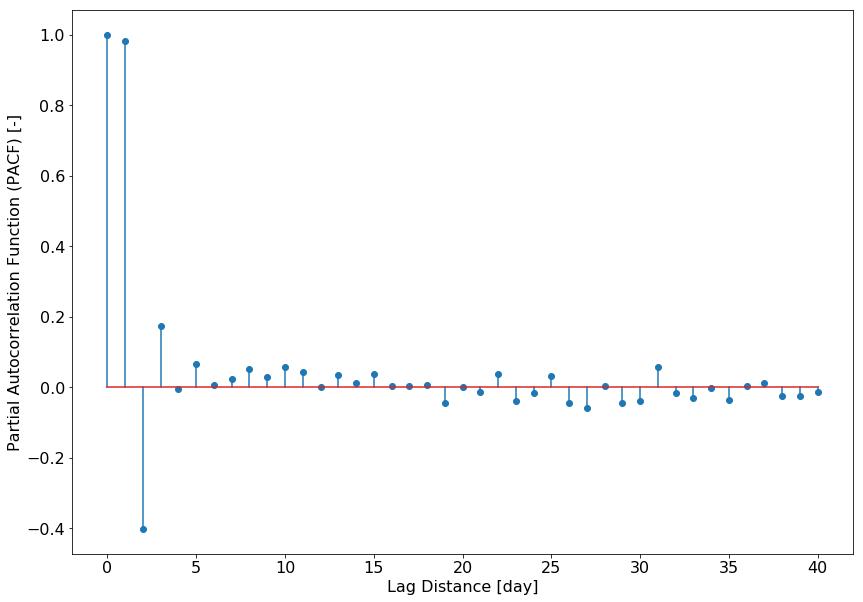

In [7]:
Qt = pd.Series(df_train['Q (cms)'].values,df_train['SerDates'].values)

Qpacf = sm.pacf(Qt)

plt.figure(figsize=(14,10))
plt.stem(Qpacf)
plt.ylabel('Partial Autocorrelation Function (PACF) [-]',fontsize=16)
plt.xlabel('Lag Distance [day]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf
f, axarr = plt.subplots(1, 1, figsize=(14,10))
_ = plot_pacf(Qt,method='ols',lags=40,ax=axarr.axes)
axarr.set_title('Statsmodel plot of PACF',fontsize=16)
axarr.set_ylabel('Partial Autocorrelation Function (PACF) [-]',fontsize=16)
axarr.set_xlabel('Lag Distance [day]',fontsize=16)
axarr = plt.gca()
axarr.tick_params('both',labelsize=16)

### Task 3.2. Use the YW Equations to estimate the AR(1) parameters

In [25]:
Qtrain = df_train['Q (cms)'].values
Qtest  = df_test['Q (cms)'].values

DatesTest = df_test['SerDates'].values

Qttm1 = np.concatenate([Qtrain[-2:-1],Qtest[0:-1]])
Qttm2 = np.concatenate([Qtrain[-3:-1],Qtest[0:-2]])

AR1_mu   = Q_AR1_model.params[0]
AR1_phi1 = Q_AR1_model.params[1]

QhatAR1 = AR1_mu + AR1_phi1*Qttm1
print(AR1_mu)
print(AR1_phi1)

0.59051767824
0.982482380335


### Task 3.3. Use the statsmodel AR tools to estimate the parameters based on the dataset

In [20]:
Q_AR1_model = sm.AR(Qt).fit(1)
print(Q_AR1_model.params)

const    0.590518
L1.y     0.982482
dtype: float64


## Task 2.1 Generate a histogram of data to understand distribution of data
This cell creates a histogram for which I use to observe any initial thoughts about the stationarity of the time series.

## Task 2.2 Compute key descriptive statistics
 To calculate statistics, I first use the "describe" function to obtain basic descriptive statistics for my time series data. These statistics include mean, standard deviation, minimum, 25%, 50%, and 75% quartile, as well as maximum. This function can be found in the Pandas library. After that, I calculate the same statistics using a different method.

## Task 3.1 Compute and report the slope of a regression line 
The following cell generates a least squares polynomial fit of the time series data and reports the linear regression function including the slope. Following that calculation, I plot the data with the linear regression. Worth noting is the slope of the regression line. This is significant because it initially appears the data is not stationary based on the non-zero slope.

## Task 3.2 Compute and report the Augmented Dickey-Fuller test
Following the computation of the linear regression, I also perform a Augmented Dickey-Fuller (ADF) Test to assess the stationarity of the data in the following cell.

## Task 4.1 Compute and plot autocorrelation function (2 methods)
As we learned in class, there are multiple ways to compute and plot the autocorrelation function. In this notebook, I calculate the autocorrelation two ways which can be seen in the following cells.

In [ ]:
autocorrelation_plot(df['Q']) # this function calculates the autocorrelation coeffecient for lag = 0-6209
plt.ylim(-0.5,1.0)
plt.show()

In [ ]:
Nk2 = 6209 # Length of data series (days)
K2 = np.arange(0,Nk2,1)

Qp = Q - np.mean(Q) # normalize data

autocovs2 = np.correlate(Qp, Qp, mode='full') # Cross correlation of normalized data
N = autocovs2.size
autocovs2_oneside = autocovs2[N//2:]
autocorrs2_oneside = autocovs2_oneside/autocovs2_oneside[0]

plt.figure(figsize=(14,10)) # plot of autocorrelation function using a second method
plt.plot(K2,autocorrs2_oneside[0:Nk2],'-')
plt.ylim(-1.0,1.0)
plt.xlim(0.0,np.amax(K2.astype(float)))
plt.title('Autocorrelation function of MF Boise discharge',fontsize=16)
plt.xlabel('Lag distance [days]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

## Task 5 Discussion
Assessing trends of this time series dataset indicate a few important things worth noting. First, the histogram shows a very right skewed distribution. This seems to be the tendency of an unregulated river environemnt with a hydrograph heavily influenced by snowmelt. A majority of the data in the MF Boise River populates the left side of the histogram. Also, by fitting a linear regression to the data, I recognize the slope of the regression line is slightly positive. Environmental factors are likely to be blamed for this trend (i.e. snowpack, rainfall, etc). If the data is not detrended, we lose focuse on how the data fluctuates around the apparent trend. However, I think it's important to recognize this trend and how it's applied to physical concepts of hydrologic data. Since we see an increasing trend in the data, it makes sense that the autocorrelation coefficient pinches off to zero through a lag of 6209 days beacuse flows are generally increasing throughout the time series, an indicator of how flows are behaving more recently. Finally, the ADF test indicates that this data is wide sense stationarity.